### **Fusion Transcript (FT) Raw Data Exploration**

#### **Introduction**

This notebook details the processes (semi-automated) done to further process the raw output files from Arriba and FusionCatcher fusion transcript callers. 

1. Run the `pypolars-process-ft-tsv.py` script to generate fusion transcript list from Arriba and FusionCatcher output files. The script takes a mandatory input of path to the directory where sample-specific fusion call output files from Arriba or FusionCatcher are stored as the first argument, and the specific string that is used to identify tool name (`arr` for Arriba fusion transcript call output file prefix, for instance). 

	For example:
	> ``` pypolars-process-ft-tsv.py data/FTmyBRCAs_raw/Arriba arr ```

	Do the same for the FusionCatcher raw output files, as well as the same Arriba and FusionCatcher output files generated from the processing 113 TCGA-Normals (to use as a panel of normals for FT filtering).

2. Then, load up the two datasets on Jupyter Notebook and concatenate the dataframes together so that Arriba+FusionCatcher unfiltered FT data are combined into one data table and saved in one `.parquet` and `.tsv` file. Do the same for the `TCGANormals` panel of normals.

In [1]:
# first, import packages
import polars as pl
import pandas as pd

from itables import init_notebook_mode, show
#init_notebook_mode(all_interactive=True)
import itables.options as opt
opt.maxBytes = "100KB"

pd.set_option('display.html.table_schema', False)
pd.set_option('display.html.use_mathjax', False)

In [2]:
# load up MyBrCa datasets
arr_mdf = pl.scan_parquet('output/MyBrCa/Arriba-FT-all-unfilt-list-v2.parquet')
fc_mdf = pl.scan_parquet('output/MyBrCa/FusionCatcher-FT-all-unfilt-list-v2.parquet')

# now load TCGANormals
arr_norms_mdf = pl.scan_parquet('output/TCGANormals/Arriba-Normal-FT-all-unfilt-list-v2.parquet')
fc_norms_mdf = pl.scan_parquet('output/TCGANormals/FusionCatcher-Normal-FT-all-unfilt-list-v2.parquet')

##### **Dataset 1A** (MyBrCa): Arriba unfiltered

In [3]:
from IPython.display import display, HTML

display(HTML("Arriba MyBrCa datatable dimension: " + f"<b>{arr_mdf.collect().shape}</b>"))

pl.DataFrame.to_pandas(arr_mdf.collect(), use_pyarrow_extension_array=True).head()


,fusionTranscriptID,fusionGeneID,breakpointID,strand1,strand2,site1,site2,type,confidence,sampleID,toolID
0,TRMT11::SMG6__6:125986622-17:2244719,TRMT11::SMG6,6:125986622-17:2244719,+,-,CDS/splice-site,CDS/splice-site,translocation,high,1,Arriba
1,STAG3::MEF2C-AS1__7:100189570-5:88919251,STAG3::MEF2C-AS1,7:100189570-5:88919251,+,-,CDS,intron,translocation/5'-5',low,1,Arriba
2,MAPK13::C1QL1__6:36132629-17:44965446,MAPK13::C1QL1,6:36132629-17:44965446,+,+,CDS,intron,translocation/5'-5',low,1,Arriba
3,STX16::NPEPL1__20:58673711-20:58691724,STX16::NPEPL1,20:58673711-20:58691724,+,+,CDS/splice-site,5'UTR/splice-site,deletion/read-through,low,1,Arriba
4,MAPK13::NMT1__6:36132629-17:44965446,MAPK13::NMT1,6:36132629-17:44965446,+,+,CDS,intron,translocation,low,1,Arriba


##### **Dataset 1B** (MyBrCa): FusionCatcher unfiltered

In [4]:
from IPython.display import display, HTML

display(HTML("FusionCatcher MyBrCa datatable dimension: " + f"<b>{fc_mdf.collect().shape}</b>"))

pl.DataFrame.to_pandas(fc_mdf.collect(), use_pyarrow_extension_array=True).head()

,fusionTranscriptID,fusionGeneID,breakpointID,strand1,strand2,site1,site2,type,confidence,sampleID,toolID
0,SIDT2::TAGLN__11:117195915-11:117203002,SIDT2::TAGLN,11:117195915-11:117203002,+,+,CDS(truncated),UTR,.,.,2,FusionCatcher
1,AZGP1::GJC3__7:99971746-7:99923603,AZGP1::GJC3,7:99971746-7:99923603,-,-,in-frame,.,.,.,2,FusionCatcher
2,NPEPPS::TBC1D3__17:47592545-17:38191030,NPEPPS::TBC1D3,17:47592545-17:38191030,+,-,CDS(complete),UTR,.,.,2,FusionCatcher
3,CYP4F11::CYP4F23P__19:15914762-19:15583580,CYP4F11::CYP4F23P,19:15914762-19:15583580,-,+,CDS(truncated),exonic(no-known-CDS),.,.,2,FusionCatcher
4,SLC49A3::ATP5ME__4:686532-4:673401,SLC49A3::ATP5ME,4:686532-4:673401,-,-,out-of-frame,.,.,.,3,FusionCatcher


##### **Dataset 2A** (TCGA Normals): Arriba unfiltered

In [5]:
from IPython.display import display, HTML

display(HTML("Arriba TCGA-Normals datatable dimension: " + f"<b>{arr_norms_mdf.collect().shape}</b>"))

pl.DataFrame.to_pandas(arr_norms_mdf.collect(), use_pyarrow_extension_array=True).head()

,fusionTranscriptID,fusionGeneID,breakpointID,strand1,strand2,site1,site2,type,confidence,sampleID,toolID
0,TRPM7::SPPL2A__15:50686531-15:50749746,TRPM7::SPPL2A,15:50686531-15:50749746,-,-,CDS/splice-site,CDS/splice-site,duplication,high,TCGA-A7-A0CE,Arriba
1,AC084756.2::SPPL2A__15:50686531-15:50749746,AC084756.2::SPPL2A,15:50686531-15:50749746,-,-,CDS/splice-site,CDS/splice-site,duplication,high,TCGA-A7-A0CE,Arriba
2,BOLA2B::SMG1P5__16:30193358-16:30288681,BOLA2B::SMG1P5,16:30193358-16:30288681,-,-,CDS/splice-site,exon,duplication,high,TCGA-A7-A0CE,Arriba
3,FBXO25::SEPTIN14__8:435707-7:55796092,FBXO25::SEPTIN14,8:435707-7:55796092,+,-,CDS/splice-site,CDS/splice-site,translocation,high,TCGA-A7-A0CE,Arriba
4,TVP23C::CDRT4__17:15503098-17:15440285,TVP23C::CDRT4,17:15503098-17:15440285,-,-,CDS,5'UTR/splice-site,deletion/read-through,medium,TCGA-A7-A0CE,Arriba


##### **Dataset 2B** (TCGA Normals): FusionCatcher unfiltered

In [6]:
from IPython.display import display, HTML

display(HTML("FusionCatcher TCGA-Normals datatable dimension: " + f"<b>{fc_norms_mdf.collect().shape}</b>"))

pl.DataFrame.to_pandas(fc_norms_mdf.collect(), use_pyarrow_extension_array=True).head()

,fusionTranscriptID,fusionGeneID,breakpointID,strand1,strand2,site1,site2,type,confidence,sampleID,toolID
0,AZGP1::GJC3__7:99971746-7:99923603,AZGP1::GJC3,7:99971746-7:99923603,-,-,in-frame,.,.,.,TCGA-A7-A0CE,FusionCatcher
1,AZGP1::GJC3__7:99971745-7:99929620,AZGP1::GJC3,7:99971745-7:99929620,-,-,UTR,CDS(complete),.,.,TCGA-A7-A0CE,FusionCatcher
2,NPEPPS::TBC1D3__17:47592545-17:38191030,NPEPPS::TBC1D3,17:47592545-17:38191030,+,-,CDS(complete),UTR,.,.,TCGA-A7-A0CE,FusionCatcher
3,SMG1::NPIPB5__16:18858170-16:22513522,SMG1::NPIPB5,16:18858170-16:22513522,-,+,CDS(truncated),UTR,.,.,TCGA-A7-A0CE,FusionCatcher
4,SMG1::NPIPB5__16:18858211-16:22513522,SMG1::NPIPB5,16:18858211-16:22513522,-,+,CDS(truncated),UTR,.,.,TCGA-A7-A0CE,FusionCatcher


#### **Concatenate Arriba and FusionCatcher Datasets**

Now, we can merge the two dataframes into one masterFrame for each cohort data (MyBrCa & TCGA panel of normals) using Polars' `concat` (vertical concatenation is the default, where two dataframes sharing the exact same columns would be joined together, adding all rows of dataframe 1 and 2 vertically).

In [7]:
%%capture --no-stdout --no-display

joined_df = pl.concat(
    [
        arr_mdf.collect(),
        fc_mdf.collect()
    ]
)
from IPython.display import display, HTML

display(HTML("Concatenated MyBrCa Arriba+FusionCatcher datatable dimension: " + f"<b>{joined_df.shape}</b>"))

pl.DataFrame.to_pandas(joined_df, use_pyarrow_extension_array=True).head()

,fusionTranscriptID,fusionGeneID,breakpointID,strand1,strand2,site1,site2,type,confidence,sampleID,toolID
0,TRMT11::SMG6__6:125986622-17:2244719,TRMT11::SMG6,6:125986622-17:2244719,+,-,CDS/splice-site,CDS/splice-site,translocation,high,1,Arriba
1,STAG3::MEF2C-AS1__7:100189570-5:88919251,STAG3::MEF2C-AS1,7:100189570-5:88919251,+,-,CDS,intron,translocation/5'-5',low,1,Arriba
2,MAPK13::C1QL1__6:36132629-17:44965446,MAPK13::C1QL1,6:36132629-17:44965446,+,+,CDS,intron,translocation/5'-5',low,1,Arriba
3,STX16::NPEPL1__20:58673711-20:58691724,STX16::NPEPL1,20:58673711-20:58691724,+,+,CDS/splice-site,5'UTR/splice-site,deletion/read-through,low,1,Arriba
4,MAPK13::NMT1__6:36132629-17:44965446,MAPK13::NMT1,6:36132629-17:44965446,+,+,CDS,intron,translocation,low,1,Arriba


In [8]:
# save joined df to files
### UNCOMMENT TO SAVE
# joined_df.write_csv('output/MyBrCa/Arr_FC-concat-FT-all-unfilt-list-v2.tsv', separator='\t')

# joined_df.write_parquet('output/MyBrCa/Arr_FC-concat-FT-all-unfilt-list-v2.parquet')

Do the same with the TCGA panel of normal FTs.

In [9]:
%%capture --no-stdout --no-display

joined_norms_df = pl.concat(
    [
        arr_norms_mdf.collect(),
        fc_norms_mdf.collect()
    ]
)
from IPython.display import display, HTML

display(HTML("Concatenated TCGA Normals Arriba+FusionCatcher datatable dimension: " + f"<b>{joined_norms_df.shape}</b>"))

pl.DataFrame.to_pandas(joined_norms_df, use_pyarrow_extension_array=True).head()

,fusionTranscriptID,fusionGeneID,breakpointID,strand1,strand2,site1,site2,type,confidence,sampleID,toolID
0,TRPM7::SPPL2A__15:50686531-15:50749746,TRPM7::SPPL2A,15:50686531-15:50749746,-,-,CDS/splice-site,CDS/splice-site,duplication,high,TCGA-A7-A0CE,Arriba
1,AC084756.2::SPPL2A__15:50686531-15:50749746,AC084756.2::SPPL2A,15:50686531-15:50749746,-,-,CDS/splice-site,CDS/splice-site,duplication,high,TCGA-A7-A0CE,Arriba
2,BOLA2B::SMG1P5__16:30193358-16:30288681,BOLA2B::SMG1P5,16:30193358-16:30288681,-,-,CDS/splice-site,exon,duplication,high,TCGA-A7-A0CE,Arriba
3,FBXO25::SEPTIN14__8:435707-7:55796092,FBXO25::SEPTIN14,8:435707-7:55796092,+,-,CDS/splice-site,CDS/splice-site,translocation,high,TCGA-A7-A0CE,Arriba
4,TVP23C::CDRT4__17:15503098-17:15440285,TVP23C::CDRT4,17:15503098-17:15440285,-,-,CDS,5'UTR/splice-site,deletion/read-through,medium,TCGA-A7-A0CE,Arriba


In [10]:
# save joined df to files

### UNCOMMENT TO SAVE
# joined_norms_df.write_csv('output/TCGANormals/Arr_FC-Normals-concat-FT-all-unfilt-list-v2.tsv', separator='\t')

# joined_norms_df.write_parquet('output/TCGANormals/Arr_FC-Normals-concat-FT-all-unfilt-list-v2.parquet')

#### **Filter MyBrCa Merged Datatable using Panel of Normals**
Now we can filter the unfiltered FT datatable by discarding those that are present in TCGA Normal datatable.


In [11]:
# first load the parquet files
# load up MyBrCa datasets
mybrca_ccdf = pl.scan_parquet('output/MyBrCa/Arr_FC-concat-FT-all-unfilt-list-v2.parquet')

# now load TCGANormals
norms_ccdf = pl.scan_parquet('output/TCGANormals/Arr_FC-Normals-concat-FT-all-unfilt-list-v2.parquet')

In [12]:
mybrca_ccdf_pan = pl.DataFrame.to_pandas(mybrca_ccdf.collect(), use_pyarrow_extension_array=True)

mybrca_ccdf_pan

,fusionTranscriptID,fusionGeneID,breakpointID,strand1,strand2,site1,site2,type,confidence,sampleID,toolID
0,TRMT11::SMG6__6:125986622-17:2244719,TRMT11::SMG6,6:125986622-17:2244719,+,-,CDS/splice-site,CDS/splice-site,translocation,high,1,Arriba
1,STAG3::MEF2C-AS1__7:100189570-5:88919251,STAG3::MEF2C-AS1,7:100189570-5:88919251,+,-,CDS,intron,translocation/5'-5',low,1,Arriba
2,MAPK13::C1QL1__6:36132629-17:44965446,MAPK13::C1QL1,6:36132629-17:44965446,+,+,CDS,intron,translocation/5'-5',low,1,Arriba
3,STX16::NPEPL1__20:58673711-20:58691724,STX16::NPEPL1,20:58673711-20:58691724,+,+,CDS/splice-site,5'UTR/splice-site,deletion/read-through,low,1,Arriba
4,MAPK13::NMT1__6:36132629-17:44965446,MAPK13::NMT1,6:36132629-17:44965446,+,+,CDS,intron,translocation,low,1,Arriba
...,...,...,...,...,...,...,...,...,...,...,...
80824,CTBS::GNG5__1:84563257-1:84501970,CTBS::GNG5,1:84563257-1:84501970,-,-,in-frame,.,.,.,991,FusionCatcher
80825,MRPS30-DT::LINC02224__5:44808642-5:44658557,MRPS30-DT::LINC02224,5:44808642-5:44658557,-,-,exonic(no-known-CDS),exonic(no-known-CDS),.,.,991,FusionCatcher
80826,NBEA::CR382287.1__13:35070852-21:10127330,NBEA::CR382287.1,13:35070852-21:10127330,+,+,CDS(truncated),exonic(no-known-CDS),.,.,991,FusionCatcher
80827,HACL1::COLQ__3:15563358-3:15489637,HACL1::COLQ,3:15563358-3:15489637,-,-,out-of-frame,.,.,.,991,FusionCatcher


In [13]:
norms_ccdf_pan = pl.DataFrame.to_pandas(norms_ccdf.collect(), use_pyarrow_extension_array=True)

norms_ccdf_pan

,fusionTranscriptID,fusionGeneID,breakpointID,strand1,strand2,site1,site2,type,confidence,sampleID,toolID
0,TRPM7::SPPL2A__15:50686531-15:50749746,TRPM7::SPPL2A,15:50686531-15:50749746,-,-,CDS/splice-site,CDS/splice-site,duplication,high,TCGA-A7-A0CE,Arriba
1,AC084756.2::SPPL2A__15:50686531-15:50749746,AC084756.2::SPPL2A,15:50686531-15:50749746,-,-,CDS/splice-site,CDS/splice-site,duplication,high,TCGA-A7-A0CE,Arriba
2,BOLA2B::SMG1P5__16:30193358-16:30288681,BOLA2B::SMG1P5,16:30193358-16:30288681,-,-,CDS/splice-site,exon,duplication,high,TCGA-A7-A0CE,Arriba
3,FBXO25::SEPTIN14__8:435707-7:55796092,FBXO25::SEPTIN14,8:435707-7:55796092,+,-,CDS/splice-site,CDS/splice-site,translocation,high,TCGA-A7-A0CE,Arriba
4,TVP23C::CDRT4__17:15503098-17:15440285,TVP23C::CDRT4,17:15503098-17:15440285,-,-,CDS,5'UTR/splice-site,deletion/read-through,medium,TCGA-A7-A0CE,Arriba
...,...,...,...,...,...,...,...,...,...,...,...
14556,F11R::RBM4__1:161019399-11:66652310,F11R::RBM4,1:161019399-11:66652310,-,+,intronic,CDS(truncated),.,.,TCGA-GI-A2C9,FusionCatcher
14557,FBXO25::FAM157B__8:435707-9:138243620,FBXO25::FAM157B,8:435707-9:138243620,+,+,CDS(truncated),exonic(no-known-CDS),.,.,TCGA-GI-A2C9,FusionCatcher
14558,MAGT1::STAC2__X:77891455-17:39211643,MAGT1::STAC2,X:77891455-17:39211643,-,-,intronic,UTR,.,.,TCGA-GI-A2C9,FusionCatcher
14559,PTPRF::IGK@__1:43622869-2:89150246,PTPRF::IGK@,1:43622869-2:89150246,+,-,UTR,---,.,.,TCGA-GI-A2C9,FusionCatcher


Use Polars' `filter` expression with `is_in` and the negation `~` to keep only unique rows for column `breakpointID` in MyBrCa dataframe that are NOT in the `breakpointID` in TCGANormals dataframe. 

In [14]:
normfilt_mybrca_ccdf = mybrca_ccdf.collect().filter(~pl.col('breakpointID').is_in(norms_ccdf.collect()['breakpointID']))

print(normfilt_mybrca_ccdf.shape)
normfilt_mybrca_ccdf.head()

(60031, 11)


fusionTranscriptID,fusionGeneID,breakpointID,strand1,strand2,site1,site2,type,confidence,sampleID,toolID
str,str,str,cat,cat,cat,cat,cat,cat,cat,cat
"""TRMT11::SMG6__…","""TRMT11::SMG6""","""6:125986622-17…","""+""","""-""","""CDS/splice-sit…","""CDS/splice-sit…","""translocation""","""high""","""1""","""Arriba"""
"""STAG3::MEF2C-A…","""STAG3::MEF2C-A…","""7:100189570-5:…","""+""","""-""","""CDS""","""intron""","""translocation/…","""low""","""1""","""Arriba"""
"""MAPK13::C1QL1_…","""MAPK13::C1QL1""","""6:36132629-17:…","""+""","""+""","""CDS""","""intron""","""translocation/…","""low""","""1""","""Arriba"""
"""MAPK13::NMT1__…","""MAPK13::NMT1""","""6:36132629-17:…","""+""","""+""","""CDS""","""intron""","""translocation""","""low""","""1""","""Arriba"""
"""TMEM63A::SRP9(…","""TMEM63A::SRP9(…","""1:225853629-1:…","""-""","""-""","""CDS/splice-sit…","""intergenic""","""deletion/read-…","""high""","""2""","""Arriba"""


Use `group_by` and `n_unique()` in Polars to create a count table for unique `breakpointID` and how "shared" it is across our MyBrCa cohort. 

In [15]:
# test on toy df
# df = pl.DataFrame(
#     {
#         "a": [1, 1, 2, 3, 4, 5],
#         "b": [0.5, 0.5, 1.0, 2.0, 3.0, 3.0],
#         "c": [True, True, True, False, True, True],
#     }
# )
# print(df)
# print(df.select(pl.col(["a", "b"])))
# print(df.select(pl.col(["a", "b"])).group_by("b").n_unique())

Here, we subset the dataframe into just `breakpointID` and `sampleID` and then use `group_by` on the `breakpointID` column, then counting number of unique occurences of each unique `breakpointID` in the `sampleID` column. 

This would return a count of unique samples (patients) one particular unique breakpoint appears in. I call this the `sharednessDegree`.

> **NOTE:** This is the best way to address miscounting breakpoints that appear in multiple rows due to differences in gene naming but they are only seen in one sample. Using other counting strategies such as window function (`.over` method) will count these duplicate rows as separate entities when in reality they are the same breakpoint seen in just one patient.

In [16]:
normfilt_mybrca_sharedness = normfilt_mybrca_ccdf.select(pl.col(["breakpointID", "sampleID"])).group_by("breakpointID").n_unique().rename({"sampleID": "sharednessDegree"})

normfilt_mybrca_sharedness.sort("sharednessDegree", descending=True)

breakpointID,sharednessDegree
str,u32
"""5:141352669-5:…",118
"""6:73510899-X:1…",72
"""X:71141271-14:…",67
"""22:36190233-13…",54
"""11:122538653-6…",52
"""9:72874016-4:9…",50
"""2:89149998-8:5…",49
"""2:197489730-17…",44
"""1:154176854-17…",42


#### **Plotting the Sharedness Degree**

We have used Polars to easily group and count the number of patients sharing a particular breakpoint ID for each unique breakpoint ID as above, let's formalize that again by using Pandas instead.

First, subset the filtered dataframe to just the two columns we are interested in using Polars, but this time prepend the "P" string to all values of the `sampleID` column, then convert to Pandas for visualization.

In [17]:
bp_sample_array = normfilt_mybrca_ccdf.select(
    pl.col("breakpointID"),
    pl.concat_str(pl.lit("P"), pl.col("sampleID")).alias("sampleID")
)

bpsample_pdf = bp_sample_array.to_pandas()
bpsample_pdf

,breakpointID,sampleID
0,6:125986622-17:2244719,P1
1,7:100189570-5:88919251,P1
2,6:36132629-17:44965446,P1
3,6:36132629-17:44965446,P1
4,1:225853629-1:225800825,P2
...,...,...
60026,19:17339599-2:199880598,P990
60027,16:85801278-17:7313728,P991
60028,11:68213477-11:28110166,P991
60029,5:44808642-5:44658557,P991


Due to the annotation redundancy in `fusionGeneID` column in the original df, we now have rows in `breakpointID` and `sampleID` that are repeated (i.e. `6:36132629-17:44965446	P1` as seen above). Let's filter these out, as they represent the same putative FT.

In [18]:
# Drop duplicates based on both columns
bpsample_pdf_unique = bpsample_pdf.drop_duplicates()

# see how many duplicates were removed
print("Original number of rows:", len(bpsample_pdf))
print("Number of rows after removing duplicates:", len(bpsample_pdf_unique))
print("Number of duplicates removed:", len(bpsample_pdf) - len(bpsample_pdf_unique))

Original number of rows: 60031
Number of rows after removing duplicates: 53096
Number of duplicates removed: 6935


In [19]:
bpsample_pdf_unique

,breakpointID,sampleID
0,6:125986622-17:2244719,P1
1,7:100189570-5:88919251,P1
2,6:36132629-17:44965446,P1
4,1:225853629-1:225800825,P2
5,6:149773169-6:168812792,P2
...,...,...
60015,17:74584914-17:74603850,P986
60021,8:144510903-8:144519701,P987
60022,4:105552193-4:105456745,P988
60026,19:17339599-2:199880598,P990


Now group by each unique `breakpointID` and count how many `sampleID` is associated with this breakpoint (*sharedness degree*).

In [20]:
# Group by breakpointID and count unique sampleIDs
breakpoint_counts = bpsample_pdf_unique.groupby('breakpointID')['sampleID'].nunique().reset_index()

# Rename the column for clarity
breakpoint_counts = breakpoint_counts.rename(columns={'sampleID': 'sharednessDegree'})

show(breakpoint_counts, maxBytes=0)

Then we can count the number of unique `breakpointID`s for each `sharednessDegree` value.

In [21]:
# Count the number of unique breakpointIDs for each sharednessDegree value
sharedness_counts = (
    breakpoint_counts
    .groupby('sharednessDegree')
    .agg(
        unique_bp_count=('breakpointID', 'nunique')
    )
    .reset_index()
    .sort_values('sharednessDegree')
)

show(sharedness_counts.reset_index(drop=True), maxBytes=0)

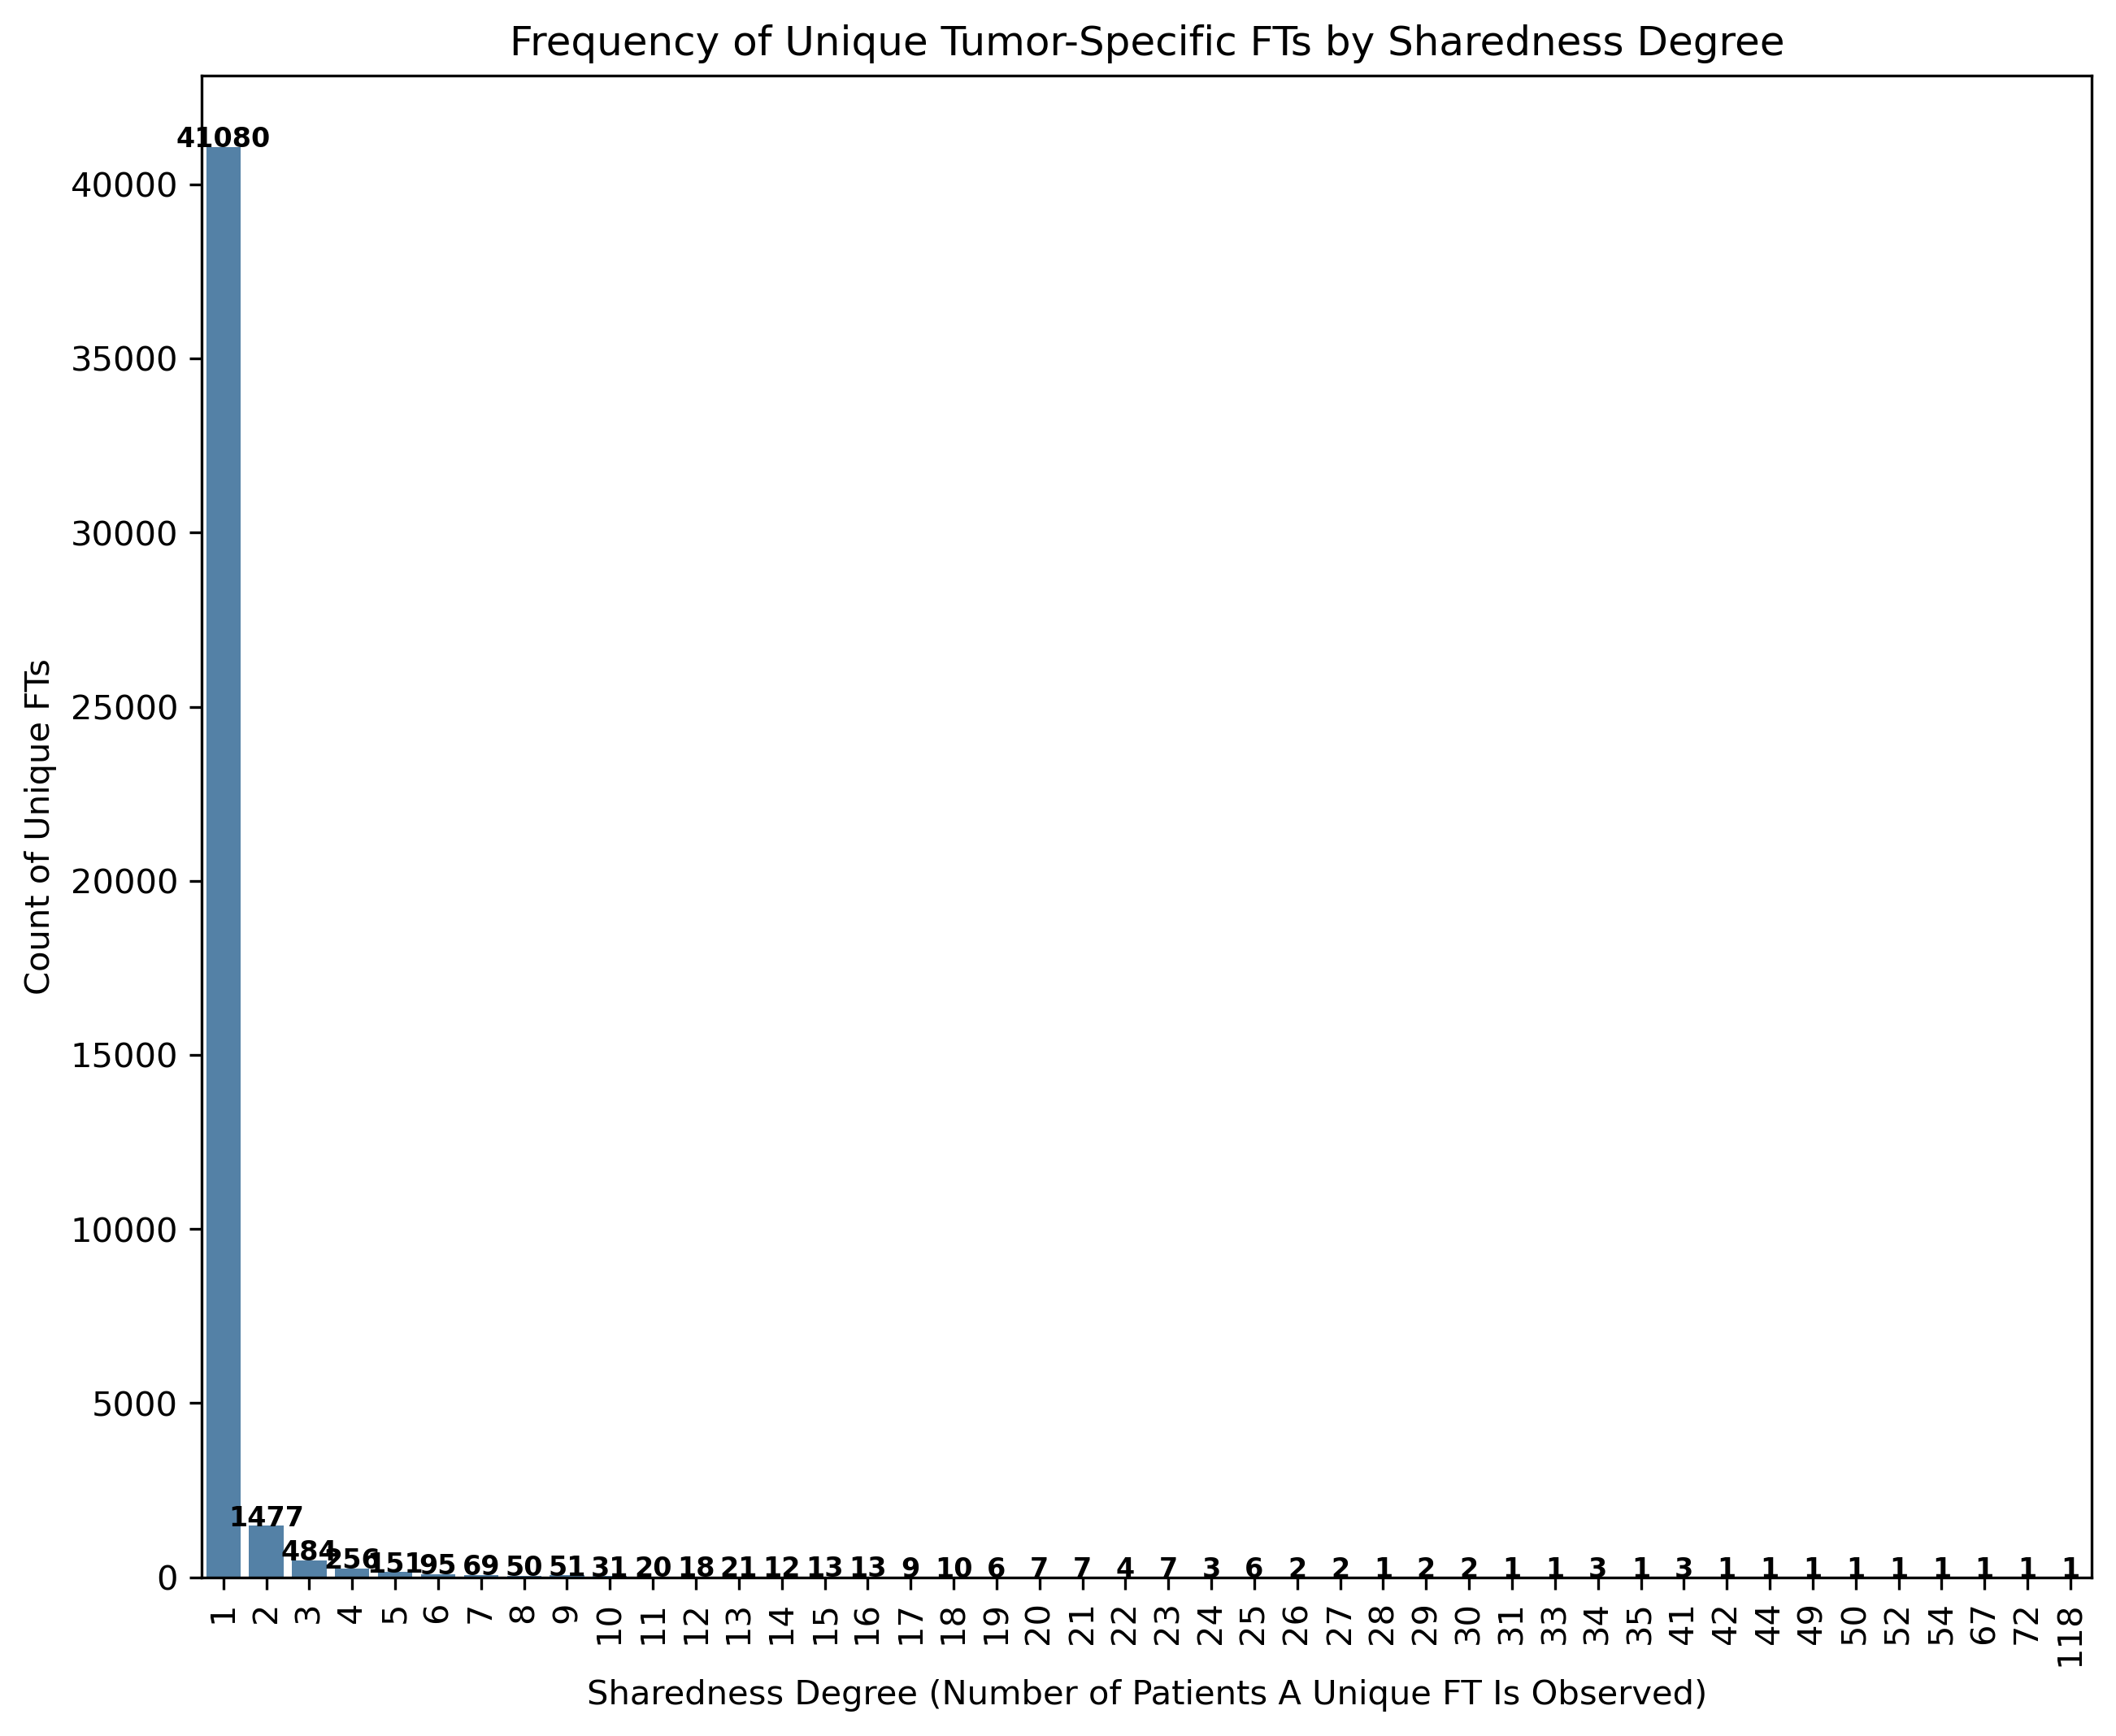

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar plot
plt.figure(figsize=(10, 8), dpi=300)
sns.barplot(x=sharedness_counts['sharednessDegree'],y=sharedness_counts['unique_bp_count'], color='steelblue')

# Add value labels on top of the bars
for i, v in enumerate(sharedness_counts['unique_bp_count']):
    plt.text(i, v, str(v), color='black', ha='center', fontweight='bold', fontsize=8)
    
# Set labels and title
plt.xlabel('Sharedness Degree (Number of Patients A Unique FT Is Observed)')
plt.ylabel('Count of Unique FTs')
plt.title('Frequency of Unique Tumor-Specific FTs by Sharedness Degree')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

### Using Graph Theory to Investigate Bipartite Relationship

We can use graph theory to explore the underlying bipartite network between unique `breakpointID` and `sampleID`.

#### Design an Analysis Class
Create a complex class called `NetworkAnalyzer` to do graph network analysis between `breakpointID` and `sampleID`. 

In [23]:
import numpy as np
import networkx as nx
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.spatial.distance import pdist, squareform
from networkx.algorithms.bipartite import density as bipartite_density
from scipy.sparse import csr_matrix

class NetworkAnalyzer:
	def __init__(self, df=None, patient_col=None, breakpoint_col=None, 
					precomputed_matrix=None, patients=None, breakpoints=None):
		"""
		Initialize NetworkAnalyzer with either DataFrame or precomputed matrix.
		
		Args:
			df (pl.DataFrame.Polars, optional): Input DataFrame HAS TO BE IN POLARS
			patient_col (str, optional): Column name for patients
			breakpoint_col (str, optional): Column name for breakpoints
			precomputed_matrix (csr_matrix, optional): Pre-computed sparse adjacency matrix
			patients (list, optional): List of patient IDs (required if using precomputed_matrix)
			breakpoints (list, optional): List of breakpoint IDs (required if using precomputed_matrix)
		"""
		if precomputed_matrix is not None:
			if patients is None or breakpoints is None:
				raise ValueError("Must provide patients and breakpoints lists with precomputed matrix")
			# Keep matrix in sparse format
			self.adj_matrix_sparse = precomputed_matrix
			self.patients = patients
			self.breakpoints = breakpoints
		elif df is not None and patient_col and breakpoint_col:
			self.df = df
			self.patient_col = patient_col
			self.breakpoint_col = breakpoint_col
			
			# Get unique sets
			self.patients = sorted(df[patient_col].unique().to_list())
			self.breakpoints = sorted(df[breakpoint_col].unique().to_list())
			
			# Create sparse adjacency matrix
			self.adj_matrix_sparse, self.patient_idx_dict, self.breakpoint_idx_dict = self._create_adjacency_matrix()
		else:
			raise ValueError("Must provide either DataFrame with column names or precomputed matrix with labels")

		# Don't calculate metrics immediately - do it lazily
		self._metrics_calculated = False
		
	def _ensure_metrics_calculated(self):
		"""Calculate metrics if they haven't been calculated yet."""
		if not self._metrics_calculated:
			self._calculate_metrics()
			self._metrics_calculated = True

	def _create_adjacency_matrix(self) -> csr_matrix:
		"""Create the sparse adjacency matrix from the input DataFrame."""
		matrix = np.zeros((len(self.patients), len(self.breakpoints)))
		connections = self.df.group_by(self.patient_col).agg(
			pl.col(self.breakpoint_col).alias('breakpoints')
		).to_dict(as_series=False)

		patient_idx = {p: i for i, p in enumerate(self.patients)}
		breakpoint_idx = {b: i for i, b in enumerate(self.breakpoints)}

		for i, patient in enumerate(connections[self.patient_col]):
			for bp in connections['breakpoints'][i]:
				matrix[patient_idx[patient]][breakpoint_idx[bp]] = 1

		return csr_matrix(matrix), patient_idx, breakpoint_idx

	def _calculate_metrics(self):
		"""Calculate various network metrics."""
		# Convert to dense only when needed for specific calculations
		dense_matrix = self.adj_matrix_sparse.toarray()
		
		self.patient_degrees = np.asarray(self.adj_matrix_sparse.sum(axis=1)).flatten()
		self.breakpoint_degrees = np.asarray(self.adj_matrix_sparse.sum(axis=0)).flatten()
		
		# Only calculate similarity matrices if needed for visualization
		self.patient_similarity = squareform(pdist(dense_matrix, metric='jaccard'))
		self.breakpoint_similarity = squareform(pdist(dense_matrix.T, metric='jaccard'))

		# Create bipartite graph more efficiently
		G = nx.Graph()
		G.add_nodes_from(range(len(self.patients)), bipartite=0)
		G.add_nodes_from(range(len(self.patients), len(self.patients) + len(self.breakpoints)), bipartite=1)
		
		# Add edges using sparse matrix coordinates
		rows, cols = self.adj_matrix_sparse.nonzero()
		edges = zip(rows, cols + len(self.patients))
		G.add_edges_from(edges)

		self.density = bipartite_density(G, range(len(self.patients), len(self.patients) + len(self.breakpoints)))
		
		# Calculate centrality
		centrality = nx.degree_centrality(G)
		self.breakpoint_centrality = [centrality[i + len(self.patients)] for i in range(len(self.breakpoints))]

	def save_matrix(self, filename):
		"""
		Save the adjacency matrix in CSR format along with patient and breakpoint labels.
		
		Args:
			filename (str): Base filename to save the data (without extension)
		"""
		# Save the sparse matrix
		sparse_matrix = self.adj_matrix_sparse
		np.savez(f"{filename}_adjac_matrix.npz",
					data=sparse_matrix.data,
					indices=sparse_matrix.indices,
					indptr=sparse_matrix.indptr,
					shape=sparse_matrix.shape)
		
		# Save the labels
		np.save(f"{filename}_matrix_label_patients.npy", np.array(self.patients))
		np.save(f"{filename}_matrix_label_breakpoints.npy", np.array(self.breakpoints))

	@classmethod
	def load_from_files(cls, filename):
		"""
		Load a NetworkAnalyzer instance from saved files.
		
		Args:
			filename (str): Base filename (without extension) used when saving
			
		Returns:
			NetworkAnalyzer: New instance with loaded data
		"""
		# Load the sparse matrix
		loader = np.load(f"{filename}_adjac_matrix.npz")
		matrix = csr_matrix((loader['data'], loader['indices'], loader['indptr']), shape=loader['shape'])
		
		# Load the labels
		patients = np.load(f"{filename}_matrix_label_patients.npy").tolist()
		breakpoints = np.load(f"{filename}_matrix_label_breakpoints.npy").tolist()

		return cls(precomputed_matrix=matrix, patients=patients, breakpoints=breakpoints)
	
	def create_adjacency_matrix_plot(self, top_bins: list = None, bottom_bins: list = None) -> go.Figure:
		"""Create a standalone plot of the patient-breakpoint adjacency matrix."""
		# Ensure metrics are calculated before accessing them
		self._ensure_metrics_calculated()

		# Convert to dense only when needed for specific calculations
		dense_matrix = self.adj_matrix_sparse.toarray()

		# If no bins are provided, plot the full adjacency matrix
		if not top_bins and not bottom_bins:
			top_bins = list(range(len(self.breakpoints)))
			top_breakpoints = self.breakpoints
			top_matrix = dense_matrix
		elif top_bins:
			top_breakpoints = [self.breakpoints[i] for i in top_bins]
			top_matrix = dense_matrix[:, top_bins]

		# Create the top breakpoints plot
		fig = go.Figure(
			data=go.Heatmap(
				z=top_matrix,
				x=top_breakpoints,
				y=self.patients,
				colorscale="Blues",
				showscale=True,
				hoverongaps=False,
				hoverinfo='text',
				text=[[f"Patient: {p}<br>Breakpoint: {b}<br>Connected: {'Yes' if top_matrix[i][j] else 'No'}"
						for j, b in enumerate(top_breakpoints)]
						for i, p in enumerate(self.patients)],
				colorbar=dict(title="Connection"),
				name="Top Breakpoints"
			)
		)

		# If bottom bins are provided, add the bottom breakpoints plot
		if bottom_bins:
			bottom_breakpoints = [self.breakpoints[i] for i in bottom_bins]
			bottom_matrix = dense_matrix[:, bottom_bins]

			fig.add_trace(
				go.Heatmap(
					z=bottom_matrix,
					x=bottom_breakpoints,
					y=self.patients,
					colorscale="Blues",
					showscale=True,
					hoverongaps=False,
					hoverinfo='text',
					text=[[f"Patient: {p}<br>Breakpoint: {b}<br>Connected: {'Yes' if bottom_matrix[i][j] else 'No'}"
							for j, b in enumerate(bottom_breakpoints)]
							for i, p in enumerate(self.patients)],
					colorbar=dict(title="Connection"),
					name="Bottom Breakpoints"
				)
			)

		fig.update_layout(
			height=1000,
			width=1400,
			title=dict(
				text="Adjacency Matrix",
				x=0.5,
				y=0.95,
				font=dict(size=18)
			),
			xaxis_title="Breakpoints",
			yaxis_title="Patients",
			template="simple_white"
		)

		return fig

	def create_degree_distribution_plot(self, top_bins: list = None, bottom_bins: list = None) -> go.Figure:
		"""Create a standalone plot of the breakpoint degree distribution."""
		# Ensure metrics are calculated before accessing them
		self._ensure_metrics_calculated()

		# If no bins are provided, plot the full degree distribution
		if not top_bins and not bottom_bins:
			top_bins = list(range(len(self.breakpoints)))
			top_breakpoints = self.breakpoints
			top_degrees = [self.breakpoint_degrees[i] for i in top_bins]

		elif top_bins:
			top_breakpoints = [self.breakpoints[i] for i in top_bins]
			top_degrees = [self.breakpoint_degrees[i] for i in top_bins]

		# Create the top breakpoints plot
		fig = go.Figure(
			data=go.Bar(
				x=top_breakpoints,
				y=top_degrees,
				hovertext=[f"Breakpoint: {bp}<br>Connected to {deg} patients"
							for bp, deg in zip(top_breakpoints, top_degrees)],
				hoverinfo='text',
				marker_color='rgb(158,202,225)',
				marker_line_color='rgb(8,48,107)',
				marker_line_width=1.5,
				name="Degree Distribution"
			)
		)

		# If bottom bins are provided, add the bottom breakpoints plot
		if bottom_bins:
			bottom_breakpoints = [self.breakpoints[i] for i in bottom_bins]
			bottom_degrees = [self.breakpoint_degrees[i] for i in bottom_bins]

			fig.add_trace(
				go.Bar(
					x=bottom_breakpoints,
					y=bottom_degrees,
					hovertext=[f"Breakpoint: {bp}<br>Connected to {deg} patients"
								for bp, deg in zip(bottom_breakpoints, bottom_degrees)],
					hoverinfo='text',
					marker_color='rgb(158,202,225)',
					marker_line_color='rgb(8,48,107)',
					marker_line_width=1.5,
					name="Bottom Breakpoints"
				)
			)

		fig.update_layout(
			height=1000,
			width=1400,
			title=dict(
				text="Breakpoint Degree Distribution",
				x=0.5,
				y=0.95,
				font=dict(size=18)
			),
			xaxis_title="Breakpoints",
			yaxis_title="Number of Patients",
			template="simple_white"
		)

		return fig
	
	def create_patient_similarity_matrix_plot(self) -> go.Figure:
		"""Create a standalone plot of the patient similarity matrix."""
		# Ensure metrics are calculated before accessing them
		self._ensure_metrics_calculated()

		# Extract the lower triangular portion of the matrix (excluding the diagonal)
		patient_similarity_lower = np.tril(1 - self.patient_similarity, -1)

		# Create a mask for the upper triangular portion (excluding the diagonal)
		patient_similarity_mask = np.tri(len(self.patients), len(self.patients), k=1, dtype=bool)

		# Create the heatmap data, setting the upper triangular portion to the maximum value
		patient_similarity_data = np.where(patient_similarity_mask, np.max(patient_similarity_lower), 1 - self.patient_similarity)

		fig = go.Figure(
			data=go.Heatmap(
				z=patient_similarity_data,
				x=self.patients,
				y=self.patients,
				colorscale="Viridis",
				showscale=True,
				colorbar=dict(title="Similarity"),
				name="Patient Similarity"
			)
		)

		fig.update_layout(
			height=1000,
			width=1400,
			title=dict(
				text="Patient Similarity Matrix",
				x=0.5,
				y=0.95,
				font=dict(size=18)
			),
			xaxis_title="Patients",
			yaxis_title="Patients",
			template="simple_white"
		)

		return fig

	def create_breakpoint_cooccurrence_plot(self) -> go.Figure:
		"""Create a standalone plot of the breakpoint co-occurrence matrix."""
		# Ensure metrics are calculated before accessing them
		self._ensure_metrics_calculated()

		# Extract the lower triangular portion of the matrix (excluding the diagonal)
		breakpoint_similarity_lower = np.tril(1 - self.breakpoint_similarity, -1)

		# Create a mask for the upper triangular portion (excluding the diagonal)
		breakpoint_similarity_mask = np.tri(len(self.breakpoints), len(self.breakpoints), k=1, dtype=bool)

		# Create the heatmap data, setting the upper triangular portion to the maximum value
		breakpoint_similarity_data = np.where(breakpoint_similarity_mask, np.max(breakpoint_similarity_lower), 1 - self.breakpoint_similarity)

		fig = go.Figure(
			data=go.Heatmap(
				z=breakpoint_similarity_data,
				x=self.breakpoints,
				y=self.breakpoints,
				colorscale="Viridis",
				showscale=True,
				colorbar=dict(title="Co-occurrence"),
				name="Breakpoint Co-occurrence"
			)
		)

		fig.update_layout(
			height=1000,
			width=1400,
			title=dict(
				text="Breakpoint Co-occurrence Matrix",
				x=0.5,
				y=0.95,
				font=dict(size=18)
			),
			xaxis_title="Breakpoints",
			yaxis_title="Breakpoints",
			template="simple_white"
		)

		return fig

	def create_dashboard(self) -> go.Figure:
		"""Create a comprehensive visualization dashboard."""
		# Ensure metrics are calculated before accessing them
		self._ensure_metrics_calculated()
		# Convert to dense only when needed for specific calculations
		dense_matrix = self.adj_matrix_sparse.toarray()
		fig = make_subplots(
			rows=2, cols=2,
			subplot_titles=("Patient-Breakpoint Adjacency Matrix", 
							"Breakpoint Degree Distribution",
							"Patient Similarity Matrix", 
							"Breakpoint Co-occurrence Matrix"),
			specs=[[{"type": "heatmap"}, {"type": "bar"}],
					[{"type": "heatmap"}, {"type": "heatmap"}]]
		)

		# 1. Adjacency Matrix with custom hover text
		hover_text = [[f"Patient: {p}<br>Breakpoint: {b}<br>Connected: {'Yes' if dense_matrix[i][j] else 'No'}"
						for j, b in enumerate(self.breakpoints)]
						for i, p in enumerate(self.patients)]

		fig.add_trace(
			go.Heatmap(
				z=dense_matrix,
				x=self.breakpoints,
				y=self.patients,
				colorscale="Blues",
				showscale=False,
				hoverongaps=False,
				hoverinfo='text',
				text=hover_text,
				colorbar=dict(title="Connection"),
				name="Connections"
			),
			row=1, col=1
		)

		# 2. Degree Distribution with custom hover
		hover_text = [f"Breakpoint: {bp}<br>Connected to {deg} patients"
						for bp, deg in zip(self.breakpoints, self.breakpoint_degrees)]

		fig.add_trace(
			go.Bar(
				x=self.breakpoints,
				y=self.breakpoint_degrees,
				hovertext=hover_text,
				hoverinfo='text',
				marker_color='rgb(158,202,225)',
				marker_line_color='rgb(8,48,107)',
				marker_line_width=1.5,
				name="Breakpoint Degrees"
			),
			row=1, col=2
		)

		# 3. Patient Similarity Matrix
		fig.add_trace(
			go.Heatmap(
				z=1 - self.patient_similarity,
				x=self.patients,
				y=self.patients,
				colorscale="Viridis",
				showscale=False,
				colorbar=dict(title="Similarity"),
				name="Patient Similarity"
			),
			row=2, col=1
		)

		# 4. Breakpoint Co-occurrence
		fig.add_trace(
			go.Heatmap(
				z=1 - self.breakpoint_similarity,
				x=self.breakpoints,
				y=self.breakpoints,
				colorscale="Viridis",
				showscale=True,
				colorbar=dict(title="Co-occurrence"),
				name="Breakpoint Co-occurrence"
			),
			row=2, col=2
		)

		fig.update_layout(
			height=1000,
			width=1200,
			title=dict(
				text="Network Analysis Dashboard",
				x=0.5,
				y=0.95,
				font=dict(size=24)
			),
			showlegend=False,
			template="simple_white"
		)

		font_size = 14
		fig.update_xaxes(title_text="Breakpoints", title_font=dict(size=font_size), row=1, col=1)
		fig.update_yaxes(title_text="Patients", title_font=dict(size=font_size), row=1, col=1)
		fig.update_xaxes(title_text="Breakpoints", title_font=dict(size=font_size), row=1, col=2)
		fig.update_yaxes(title_text="Number of Patients", title_font=dict(size=font_size), row=1, col=2)
		fig.update_xaxes(title_text="Patients", title_font=dict(size=font_size), row=2, col=1)
		fig.update_yaxes(title_text="Patients", title_font=dict(size=font_size), row=2, col=1)
		fig.update_xaxes(title_text="Breakpoints", title_font=dict(size=font_size), row=2, col=2)
		fig.update_yaxes(title_text="Breakpoints", title_font=dict(size=font_size), row=2, col=2)

		return fig
	
	def get_breakpoint_bins(self, top_percentile: float = 0.001, bottom_percentile: float = 0.001) -> tuple:
		"""
		Calculate the indexes of the breakpoints at the specified percentiles.
		Returns a tuple of two lists:
		- The first list contains the indexes of the top `top_percentile` breakpoints by degree.
		- The second list contains the indexes of the bottom `bottom_percentile` breakpoints by degree.
		"""
		# Ensure metrics are calculated before accessing them
		self._ensure_metrics_calculated()
		sorted_degrees = sorted(self.breakpoint_degrees)
		top_cutoff = int(len(sorted_degrees) * top_percentile)
		bottom_cutoff = int(len(sorted_degrees) * (1 - bottom_percentile))

		top_bins = [i for i in range(top_cutoff)]
		bottom_bins = [i for i in range(bottom_cutoff, len(sorted_degrees))]

		return top_bins, bottom_bins

	def print_summary_stats(self):
		# Ensure metrics are calculated before accessing them
		self._ensure_metrics_calculated()
		print(f"Network Summary Statistics:")
		print(f"---------------------------")
		print(f"Number of Patients: {len(self.patients)}")
		print(f"Number of Breakpoints: {len(self.breakpoints)}")
		print(f"Network Density: {self.density:.3f}")
		print(f"Average Patient Degree: {np.mean(self.patient_degrees):.2f}")
		print(f"Average Breakpoint Degree: {np.mean(self.breakpoint_degrees):.2f}")
		print(f"\nTop Breakpoints by Degree:")
		for bp, degree in sorted(zip(self.breakpoints, self.breakpoint_degrees), 
								key=lambda x: x[1], reverse=True)[:5]:
			print(f"  {bp}: {degree}")
		# print(f"\nTop 10 Breakpoints by Degree Centrality:")
    	# # Create list of (breakpoint, centrality) tuples and sort by centrality
		# centrality_pairs = list(zip(self.breakpoints, self.breakpoint_centrality))
		# sorted_by_centrality = sorted(centrality_pairs, key=lambda x: x[1], reverse=True)
		
		# # Print top 10
		# for bp, centrality in sorted_by_centrality[:10]:
		# 	print(f"  {bp}: {centrality:.3f}")

#### Test Class on Toy Data

In [24]:
# create toy data
np.random.seed(420)  # for reproducibility

patients = [f'P{i}' for i in range(1, 21)]  # 20 patients
breakpoints = [f'BP{i}' for i in range(1, 16)]  # 15 breakpoints

# Create random connections (each patient has 2-6 breakpoints)
data = []
for patient in patients:
	num_breakpoints = np.random.randint(2, 7)
	patient_breakpoints = np.random.choice(breakpoints, size=num_breakpoints, replace=False)
	for bp in patient_breakpoints:
		data.append({'patient_id': patient, 'breakpoint_id': bp})

# Create Polars DataFrame
df = pl.DataFrame(data)

# now test the class
# Create and display visualization
analyzer = NetworkAnalyzer(df, patient_col='patient_id', breakpoint_col='breakpoint_id')
fig = analyzer.create_dashboard()
# fig.show()

# Print summary statistics
analyzer.print_summary_stats()

Network Summary Statistics:
---------------------------
Number of Patients: 20
Number of Breakpoints: 15
Network Density: 0.247
Average Patient Degree: 3.70
Average Breakpoint Degree: 4.93

Top Breakpoints by Degree:
  BP8: 8.0
  BP1: 7.0
  BP2: 7.0
  BP11: 6.0
  BP12: 6.0


##### Instantiate NetworkAnalyzer class on MyBrCa Data

Now instantiate the class we built on our normal-filtered, unique-breakpoint-only subset dataFrame from MyBrCa FT data.

In [25]:
# This is DF with redundant duplicate breakpointID-sampleID pairing
print(bp_sample_array.shape)
bp_sample_array.head()

(60031, 2)


breakpointID,sampleID
str,str
"""6:125986622-17…","""P1"""
"""7:100189570-5:…","""P1"""
"""6:36132629-17:…","""P1"""
"""6:36132629-17:…","""P1"""
"""1:225853629-1:…","""P2"""


In [26]:
# This is DF with redundant duplicate breakpointID-sampleID pairing FILTERED OUT
bpsample_poldf = pl.from_pandas(bpsample_pdf_unique)
print(bpsample_poldf.shape)
bpsample_poldf.head()

(53096, 2)


breakpointID,sampleID
str,str
"""6:125986622-17…","""P1"""
"""7:100189570-5:…","""P1"""
"""6:36132629-17:…","""P1"""
"""1:225853629-1:…","""P2"""
"""6:149773169-6:…","""P2"""


##### Saving adjacency matrix to file as precomputed npz file

In [27]:
# # call the method save_matrix directly
# analyzer_my.save_matrix('output/adj_matrix_ALLDEG_mybrca_v2')

# # try reloading into an instance using the decorated class method load_from_file
# analyzer_my_reloaded = NetworkAnalyzer.load_from_files('output/adj_matrix_ALLDEG_mybrca_v2')

# # Print summary statistics
# analyzer_my.print_summary_stats()

#### Keeping FT Breakpoints Seen in More than 10 Patients (1% of the MyBrCa Cohort)

The distribution of the Sharedness Degree of each unique breakpoint, is as expected, skewed towards having a lot of unique, patient-specific connections, and very few shared breakpoints across patients. 

We can try to visualize the adjacency matrix, but because of the massive matrix dimension we have (**988 patients x 43927 unique breakpoints**), it is best to first filter out patient-specific breakpoints first. In fact, due to the fact that the putative FT neoantigen distribution is so skewed towards individualized presence, let's create a filtering threshold of keeping only the breakpoint IDs that are seen in **more than 9 patients (approximately 1% of the MyBrCa cohort)**. 


In [28]:
## go back to the sharednessDegree Pandas dataFrame
# # select rows that has sharednessDegree > 10

bp_sharedness_gt9 = pl.from_pandas(breakpoint_counts).filter(pl.col('sharednessDegree') > 9)

show(bp_sharedness_gt9, maxBytes=0)

#### or directly use the Polars dataframe normfilt_mybrca_sharedness
# 
# bp_sharedness_gt9 = normfilt_mybrca_sharedness.filter(pl.col('sharednessDegree') > 9)

Now we can use the unique, filtered, thresholded elements in the `breakpointID` column of the filtered dataFrame above, as the filtering list to keep only these same breakpoints in the other dataFrame used to instantiate `NetworkAnalyzer`. 

In [46]:
# bp_sharedness_gt9 is the dataframe with unique breakpointIDs to be used as filter
# bpsample_poldf is the dataframe to be filtered

filt_bpsample_poldf = bpsample_poldf.filter(
    pl.col("breakpointID").is_in(bp_sharedness_gt9["breakpointID"])
)

Now instantiate a NetworkAnalyzer instance.

In [47]:
analyzer_my_filt = NetworkAnalyzer(filt_bpsample_poldf, patient_col='sampleID', breakpoint_col='breakpointID')

In [48]:
# Print summary statistics
analyzer_my_filt.print_summary_stats()

Network Summary Statistics:
---------------------------
Number of Patients: 776
Number of Breakpoints: 214
Network Density: 0.024
Average Patient Degree: 5.05
Average Breakpoint Degree: 18.31

Top Breakpoints by Degree:
  5:141352669-5:141494807: 118.0
  6:73510899-X:154399517: 72.0
  X:71141271-14:77027444: 67.0
  22:36190233-13:99494501: 54.0
  11:122538653-6:30725269: 52.0


In [32]:
# call the method save_matrix directly; UNCOMMENT TO SAVE
# analyzer_my_filt.save_matrix('output/adj_matrix_GT9FILT_mybrca_v2')

##### Plot Adjacency Matrix

In [ ]:
plot = analyzer_my_filt.create_adjacency_matrix_plot()
plot.show()

In [ ]:
plot = analyzer_my_filt.create_degree_distribution_plot()
plot.show()

In [ ]:
plot = analyzer_my_filt.create_patient_similarity_matrix_plot()
plot.show()

In [ ]:
plot = analyzer_my_filt.create_breakpoint_cooccurrence_plot()
plot.show()

In [37]:
filt_matrix = analyzer_my_filt.adj_matrix_sparse.toarray()

In [38]:
def find_minimal_covering_subset(adjacency_matrix, coverage_threshold, label_to_index_dict=None):
    """
    Find minimal subset of rows that covers at least coverage_threshold fraction of columns,
    with handling for dictionary-based label mapping.

    Parameters:
    -----------
    adjacency_matrix : np.ndarray
        Binary matrix where rows are members of set A and columns are members of set B
        1 indicates overlap, 0 indicates no overlap
    coverage_threshold : float
        Fraction of set B that needs to be covered (between 0 and 1)
    label_to_index_dict : dict, optional
        Dictionary mapping labels (strings) to indices (int)
        Example: {'label1': 0, 'label2': 1, ...}

    Returns:
    --------
    tuple
        (selected_indices, selected_labels, actual_coverage)
        - selected_indices: List of numerical indices of selected rows
        - selected_labels: List of original labels corresponding to the indices
        - actual_coverage: Achieved coverage fraction
    """
    # Create reverse mapping from index to label
    if label_to_index_dict is not None:
        index_to_label = {v: k for k, v in label_to_index_dict.items()}
    
    # Work with transpose of the matrix
    working_matrix = adjacency_matrix.T
    num_rows, num_cols = working_matrix.shape
    
    # Calculate target coverage
    target_coverage = int(np.ceil(num_cols * coverage_threshold))
    print(f"Target coverage: {target_coverage} columns out of {num_cols}")
    
    # Initialize tracking variables
    selected_rows = []
    covered_cols = np.zeros(num_cols, dtype=bool)
    
    while np.sum(covered_cols) < target_coverage:
        # Calculate coverage gains for remaining rows
        available_rows = [i for i in range(num_rows) if i not in selected_rows]
        
        if not available_rows:
            break
            
        coverage_gains = np.array([
            np.sum(~covered_cols & (working_matrix[i] == 1))
            for i in available_rows
        ])
        
        if np.max(coverage_gains) == 0:
            print("No more improvements possible")
            break
            
        # Select the row that covers the most new columns
        best_row_idx = available_rows[np.argmax(coverage_gains)]
        selected_rows.append(best_row_idx)
        
        # Print progress with label if available
        if label_to_index_dict is not None:
            label = index_to_label[best_row_idx]
            new_coverage = np.sum(~covered_cols & (working_matrix[best_row_idx] == 1))
            print(f"Selected {label} (index {best_row_idx}) covering {new_coverage} new columns")
        
        # Update covered columns
        covered_cols = covered_cols | (working_matrix[best_row_idx] == 1)
    
    # Calculate actual coverage achieved
    actual_coverage = np.sum(covered_cols) / num_cols
    print(f"Achieved {actual_coverage:.2%} coverage")
    
    # Convert indices to labels if dictionary provided
    if label_to_index_dict is not None:
        selected_labels = [index_to_label[idx] for idx in selected_rows]
    else:
        selected_labels = None
    
    return selected_rows, selected_labels, actual_coverage


In [39]:
breakpoint_dict = analyzer_my_filt.breakpoint_idx_dict
filt_bp_indices, filt_bp_labels, coverage = find_minimal_covering_subset(filt_matrix, coverage_threshold=1.0, label_to_index_dict=breakpoint_dict)
print(f"Minimal coverage: {coverage}")
print(f"Minimal set of breakpoints: {filt_bp_indices}; Length of set: {len(filt_bp_indices)}")
print(f"Labels of the minimal cover set of breakpoints: {filt_bp_labels}")

Target coverage: 776 columns out of 776
Selected 5:141352669-5:141494807 (index 154) covering 118 new columns
Selected 6:73510899-X:154399517 (index 177) covering 64 new columns
Selected X:71141271-14:77027444 (index 211) covering 50 new columns
Selected 11:122538653-6:30725269 (index 7) covering 37 new columns
Selected 6:31120881-6:29929648 (index 164) covering 32 new columns
Selected 9:72874016-4:95104408 (index 207) covering 32 new columns
Selected 2:89149998-8:56074456 (index 132) covering 30 new columns
Selected 3:120675939-3:120750523 (index 134) covering 26 new columns
Selected 22:36190233-13:99494501 (index 99) covering 21 new columns
Selected 16:77191633-16:77170830 (index 54) covering 19 new columns
Selected 13:48255437-17:39715286 (index 33) covering 17 new columns
Selected 19:22052635-19:21640621 (index 72) covering 17 new columns
Selected 15:69160757-9:83712498 (index 45) covering 16 new columns
Selected 8:18343777-8:18222527 (index 202) covering 16 new columns
Selected 6:

In [40]:
patient_dict = analyzer_my_filt.patient_idx_dict
print(patient_dict)

{'P10': 0, 'P100': 1, 'P101': 2, 'P102': 3, 'P103': 4, 'P104': 5, 'P106': 6, 'P107': 7, 'P109': 8, 'P11': 9, 'P110': 10, 'P112': 11, 'P113': 12, 'P114': 13, 'P115': 14, 'P116': 15, 'P117': 16, 'P118': 17, 'P119': 18, 'P12': 19, 'P120': 20, 'P121': 21, 'P122': 22, 'P123': 23, 'P124': 24, 'P125': 25, 'P126': 26, 'P127': 27, 'P128': 28, 'P129': 29, 'P130': 30, 'P131': 31, 'P134': 32, 'P135': 33, 'P136': 34, 'P138': 35, 'P140': 36, 'P141': 37, 'P142': 38, 'P144': 39, 'P145': 40, 'P146': 41, 'P149': 42, 'P15': 43, 'P150': 44, 'P153': 45, 'P154': 46, 'P155': 47, 'P156': 48, 'P158': 49, 'P159': 50, 'P16': 51, 'P160': 52, 'P161': 53, 'P165': 54, 'P166': 55, 'P167': 56, 'P168': 57, 'P169': 58, 'P171': 59, 'P174': 60, 'P178': 61, 'P179': 62, 'P18': 63, 'P183': 64, 'P186': 65, 'P188': 66, 'P189': 67, 'P19': 68, 'P191': 69, 'P193': 70, 'P198': 71, 'P199': 72, 'P2': 73, 'P20': 74, 'P200': 75, 'P202': 76, 'P203': 77, 'P209': 78, 'P21': 79, 'P210': 80, 'P211': 81, 'P214': 82, 'P216': 83, 'P218': 84, 

In [41]:
# subset original matrix
minimal_set_cover_subset_matrix = filt_matrix[:, filt_bp_indices]
minimal_set_cover_subset_matrix.shape

(776, 82)

In [42]:
# subset the original df used to generate analyzer_my_filt instance

filt_bpsample_minsetcover_poldf = bpsample_poldf.filter(
    pl.col("breakpointID").is_in(filt_bp_labels)
)

show(filt_bpsample_minsetcover_poldf, maxBytes=0)


In [43]:
# create a new NetworkAnalyzer instance
analyzer_subset_filt = NetworkAnalyzer(filt_bpsample_minsetcover_poldf, patient_col="sampleID", breakpoint_col="breakpointID")

In [44]:
# Print summary statistics
analyzer_subset_filt.print_summary_stats()

Network Summary Statistics:
---------------------------
Number of Patients: 776
Number of Breakpoints: 82
Network Density: 0.031
Average Patient Degree: 2.51
Average Breakpoint Degree: 23.79

Top Breakpoints by Degree:
  5:141352669-5:141494807: 118.0
  6:73510899-X:154399517: 72.0
  X:71141271-14:77027444: 67.0
  22:36190233-13:99494501: 54.0
  11:122538653-6:30725269: 52.0


In [ ]:
plot = analyzer_subset_filt.create_adjacency_matrix_plot()
plot.show()

#### **Filtering Out non-TNBCs**

We can filter out rows corresponding to `sampleID` more than 172, because these are not TNBC samples.

